In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Problem1. #NULL! 을 결측치로 인식하지 못함 
1. excel에서 8747852개 공백으로 변환
2. **excel에서 dataframe 수정 후 '2020_Domestic_Tour_FS.csv'** 830971개 공백으로 변환

In [34]:
# 국내 관광 휴양 여행 2030 데이터

# 1. 공백으로 변환 후 decoding error 발생
#df = pd.read_csv('2020_Domestic_Tour_2030.csv', encoding='utf-8') 
# UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 9678: invalid start byte
# 'cp949', 'euc-kr'

# 새로 저장
# df.to_csv('2020_Domestic_Tour_2030.csv', header=True, index=False, encoding = 'utf-8-sig')
df = pd.read_csv('2020_Domestic_Tour_2030.csv')

FileNotFoundError: [Errno 2] No such file or directory: '2020_Domestic_Tour_2030.csv'

In [7]:
df.shape # (6432, 2259)

(6432, 2259)

In [31]:
df.tail(10)

,ID,SA1_1,SA1_2,SA1_4,D_TRA1_CHECK,D_TRA1_CASE,D_TRA1_SYEAR,D_TRA1_SMONTH,D_TRA1_SDAY,D_TRA1_EYEAR,...,국내_A_여행경험자1회_여행지출_기타당일_경기,국내_A_여행경험자1회_여행지출_기타당일_강원,국내_A_여행경험자1회_여행지출_기타당일_충북,국내_A_여행경험자1회_여행지출_기타당일_충남,국내_A_여행경험자1회_여행지출_기타당일_전북,국내_A_여행경험자1회_여행지출_기타당일_전남,국내_A_여행경험자1회_여행지출_기타당일_경북,국내_A_여행경험자1회_여행지출_기타당일_경남,국내_A_여행경험자1회_여행지출_기타당일_제주,tour_num
15495,39020560441_84324,1,0,0,NaN,3,2020.0,3.0,15.0,2020.0,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,16667.00,1
15496,39020570841_112921,0,1,0,Y,2,2020.0,4.0,30.0,2020.0,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,1
15497,3902057133A_259454,0,1,0,Y,2,2020.0,9.0,25.0,2020.0,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,1
15498,3902057133A_260716,0,0,1,Y,4,2020.0,9.0,29.0,2020.0,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,1
15499,3902057133A_260717,1,0,0,Y,1,2020.0,9.0,26.0,2020.0,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,1
15500,39020580191_142191,0,1,0,Y,2,2020.0,5.0,7.0,2020.0,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,1
15501,3902058033A_288916,1,0,0,Y,1,2020.0,10.0,9.0,2020.0,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,10000.00,1
15502,39020590071_172926,0,0,1,Y,4,2020.0,6.0,7.0,2020.0,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,1
15503,39020590321_202105,1,0,0,Y,1,2020.0,7.0,24.0,2020.0,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,1
15504,3902059058A_344813,1,0,0,Y,1,2020.0,11.0,7.0,2020.0,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6432 entries, 0 to 6431
Columns: 2259 entries, ID to tour_num
dtypes: float64(1514), int64(738), object(7)
memory usage: 110.9+ MB


In [20]:
null_num = df.isnull().sum()

ID                                                                     0
SA1_1                                                                  0
SA1_2                                                                  0
SA1_4                                                                  0
D_TRA1_CHECK                                                         308
                                                                    ... 
??????_A_???????????????1???_????????�???_?????�??????_??????.80    6415
??????_A_???????????????1???_????????�???_?????�??????_??????.81    6427
??????_A_???????????????1???_????????�???_?????�??????_??????.82    6414
??????_A_???????????????1???_????????�???_?????�??????_??????.83    6429
tour_num                                                               0
Length: 2259, dtype: int64

In [23]:
max(df.isnull().sum())

6432

In [24]:
null_num = df.isnull().sum()

In [25]:
type(null_num)

pandas.core.series.Series

##### D_TRA1_CASE 여행1차 여행유형 
1. 국내 관광/휴양 여행
2. 국내가족/친지/친구방문여행
3. 국내단순가족/친지/친구방문
4. 국내출장/업무여행
5. 국내단순출장/업무경험
6. 1년이내해외여행경험

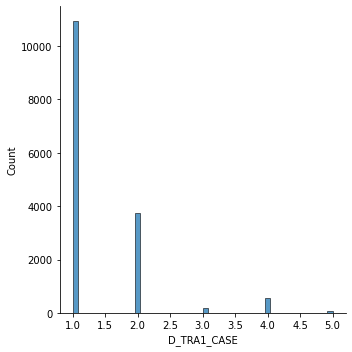

In [32]:
# D_TRA1_CASE 여행1차 여행유형 (1.국내 관광/휴양)
sns.displot(df['D_TRA1_CASE'])

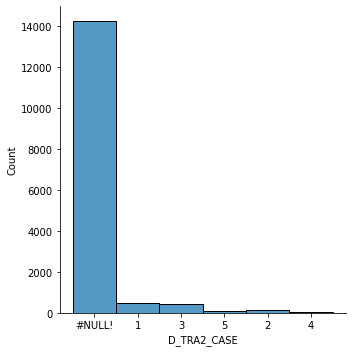

In [33]:
# 여행2차 여행유형
sns.displot(df['D_TRA2_CASE'])

#### 2. 관광 및 휴양 / 여행 1차 / 2030대 필터링
2020_Domestic_Tour_FS.csv 로 저장